# 디지털 영상의 기초

In [2]:
# RGB 컬러 영상을 채널별로 구분해 디스플레이하기
import cv2 as cv
import sys

img = cv.imread('soccer.jpg')

if img is None:
    sys.exit('Image load failed!')

cv.imshow('original_RGB', img)
cv.imshow('Upper left half', img[0:img.shape[0]//2, 0:img.shape[1]//2, :])
cv.imshow('Center half', img[img.shape[0]//4:3*img.shape[0]//4, img.shape[1]//4:3*img.shape[1]//4, :])

cv.imshow('R channel', img[:,:,2])
cv.imshow('G channel', img[:,:,1])
cv.imshow('B channel', img[:,:,0])

cv.waitKey()
cv.destroyAllWindows()

# 이진 영상

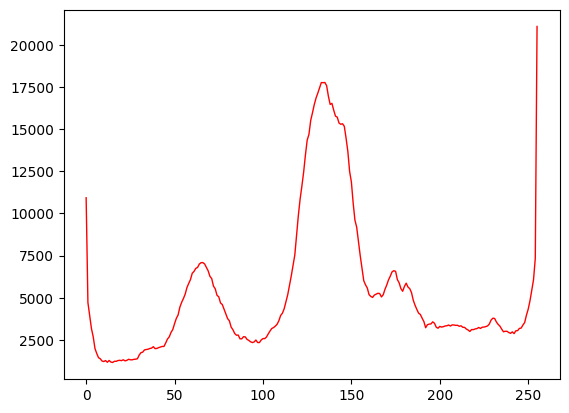

In [6]:
# 실제 영상에서 히스토그램 구하기
#import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('soccer.jpg')
h = cv.calcHist([img], [2], None, [256], [0, 256])      # 2채널(R channel)에서 히스토그램 계산
# (영상, 채널, 마스크(히스토그램을 계산할 영역), 히스토그램 크기(128일 경우 0, 1을 0으로 변환), 픽셀값 범위(128일 경우 128 이상의 값은 세지 않음))
plt.plot(h, color='r', linewidth=1)
plt.show()

In [7]:
# 오츄 알고리즘으로 이진화하기
#import cv2 as cv
#import sys

img = cv.imread('soccer.jpg')

t, bin_img = cv.threshold(img[:,:,2], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
print('오츄 알고리즘이 찾은 최적 임계값 =', t)

cv.imshow('R channel', img[:,:,2])
cv.imshow('R channel binarization', bin_img)

cv.waitKey()
cv.destroyAllWindows()

오츄 알고리즘이 찾은 최적 임계값 = 113.0


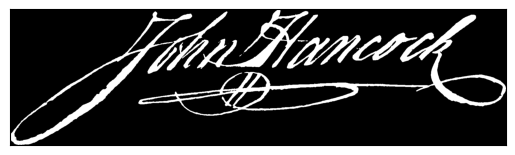

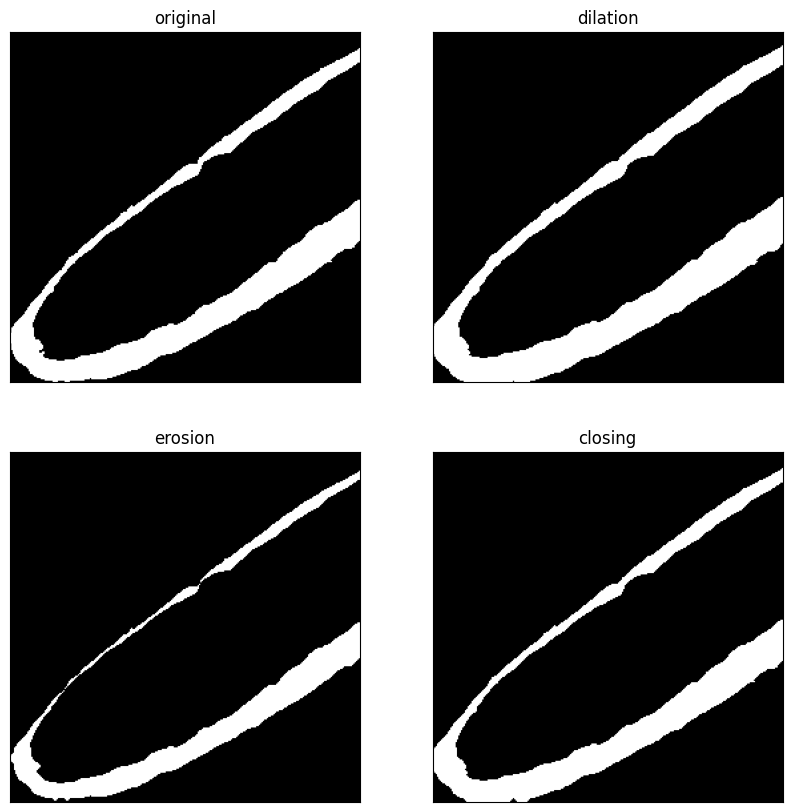

In [28]:
# 모폴로지 연산 적용하기
#import cv2 as cv
import numpy as np
#import matplotlib.pyplot as plt

img = cv.imread('JohnHancocksSignature.png', cv.IMREAD_UNCHANGED)

## 투명도 채널을 이진화하기(png는 투명도 채널이 있음)
t, bin_img = cv.threshold(img[:,:,3], 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

plt.figure(figsize=(10, 10))
b = bin_img[bin_img.shape[0]//2:bin_img.shape[0], 0:bin_img.shape[0]//2+1]
plt.subplot(221), plt.imshow(b, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('original')

## 모폴로지 구조 요소 중 하나
se = np.uint8([[0,0,1,0,0],
               [0,1,1,1,0],
               [1,1,1,1,1],
               [0,1,1,1,0],
               [0,0,1,0,0]])

## 팽창 연산
b_dilation = cv.dilate(b, se, iterations=1)     # ieration: 반복 횟수
plt.subplot(222), plt.imshow(b_dilation, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('dilation')

## 침식 연산
b_erosion = cv.erode(b, se, iterations=1)
plt.subplot(223), plt.imshow(b_erosion, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('erosion')

## 닫힘(팽창한 결과에 침식을 적용) 연산
b_closing = cv.erode(cv.dilate(b, se, iterations=1), se, iterations=1)
plt.subplot(224), plt.imshow(b_closing, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('closing')
plt.show()